In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Marital status: Tình trạng hôn nhân (ví dụ: độc thân, đã kết hôn, ly hôn...).
# Gender: Giới tính.
# Age at enrollment: Tuổi của sinh viên tại thời điểm nhập học.
# Nacionality: Quốc tịch.
# International: Sinh viên có phải là du học sinh quốc tế hay không.
# Displaced: Sinh viên có sống xa nhà không (tức là phải di chuyển từ nơi ở gốc đến nơi học, thường ngụ ý phải thuê trọ hoặc ở ký túc xá).
# Mother's qualification / Father's qualification: Trình độ học vấn của Mẹ / Cha (ví dụ: cấp 2, cấp 3, đại học...).
#Mother's occupation / Father's occupation: Nghề nghiệp của Mẹ / Cha.
#Scholarship holder: Sinh viên có đang nhận học bổng hay không.
#Debtor: Sinh viên có đang nợ tiền học phí hay không.
#Tuition fees up to date: Học phí đã được đóng đầy đủ tính đến hiện tại chưa.
#Educational special needs: Sinh viên có nhu cầu giáo dục đặc biệt nào không (khuyết tật, cần hỗ trợ đặc biệt...).
#Application mode: Phương thức xét tuyển đầu vào (ví dụ: xét điểm thi, xét học bạ, tuyển thẳng...).
#Application order: Thứ tự nguyện vọng (Sinh viên đặt ngành này là nguyện vọng 1, 2 hay 3...).
#Course: Ngành học mà sinh viên đăng ký.
#Daytime/evening attendance: Hệ đào tạo là ban ngày hay buổi tối (tại chức/vừa học vừa làm).
#Previous qualification: Trình độ học vấn trước khi nhập học (ví dụ: tốt nghiệp THPT, hay đã có bằng đại học khác).
#Bộ dữ liệu này theo dõi kết quả của 2 học kỳ đầu tiên (1st sem và 2nd sem):
#Curricular units ... (credited): Số tín chỉ được công nhận (ví dụ: được miễn giảm do đã học trước đó).
#Curricular units ... (enrolled): Số môn/tín chỉ sinh viên đăng ký học trong kỳ.
#Curricular units ... (evaluations): Số bài kiểm tra/đánh giá sinh viên đã tham gia.
#Curricular units ... (approved): Số môn/tín chỉ sinh viên đã đậu (qua môn).
#Curricular units ... (grade): Điểm trung bình các môn trong kỳ.
#Curricular units ... (without evaluations): Số môn chưa có điểm đánh giá.
#Unemployment rate: Tỷ lệ thất nghiệp.
#Inflation rate: Tỷ lệ lạm phát.
#GDP: Tổng sản phẩm quốc nội.
#Target: Kết quả phân loại sinh viên (cột nhãn để dự đoán):
#Dropout: Đã bỏ học.
#Graduate: Đã tốt nghiệp.
#Enrolled: Vẫn đang theo học.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

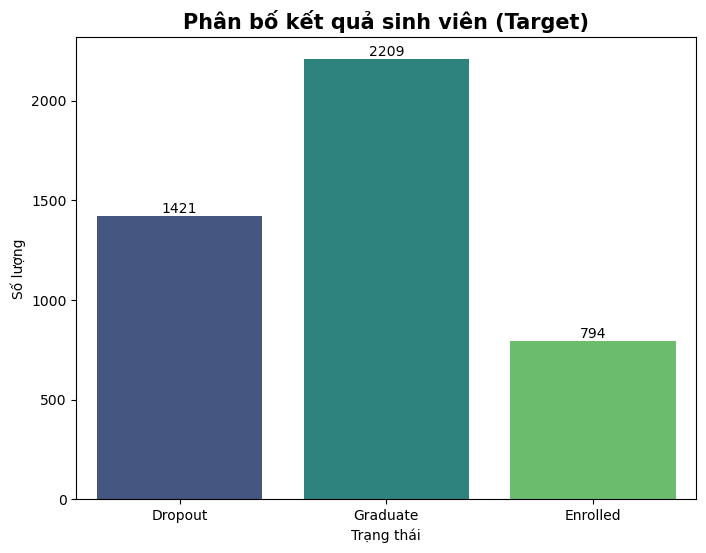

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Target', palette='viridis', hue='Target')
plt.title('Phân bố kết quả sinh viên (Target)', fontsize=15, fontweight='bold')
plt.xlabel('Trạng thái')
plt.ylabel('Số lượng')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5424\1151235134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Age at enrollment', data=df, palette='viridis')


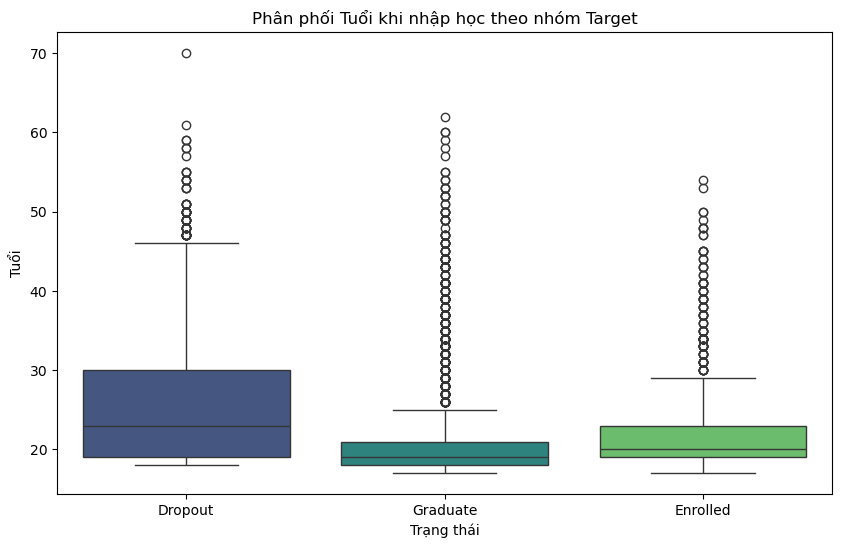

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age at enrollment', data=df, palette='viridis')
plt.title('Phân phối Tuổi khi nhập học theo nhóm Target')
plt.xlabel('Trạng thái')
plt.ylabel('Tuổi')
plt.show()

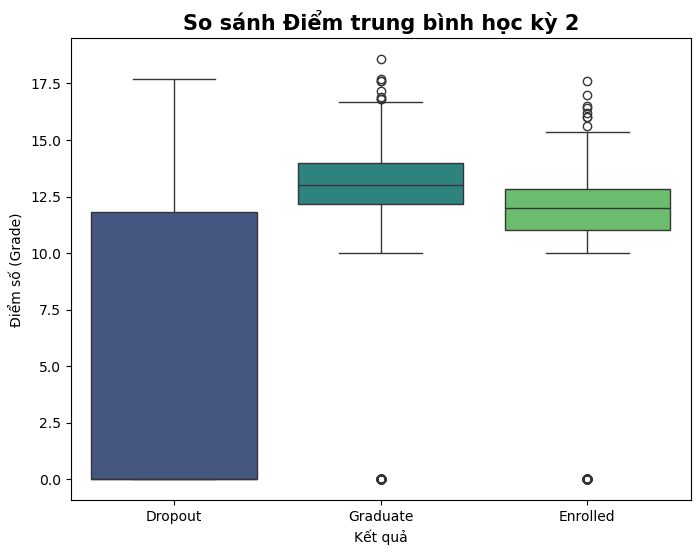

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Target', y='Curricular units 2nd sem (grade)', palette='viridis', hue='Target')
plt.title('So sánh Điểm trung bình học kỳ 2', fontsize=15, fontweight='bold')
plt.xlabel('Kết quả')
plt.ylabel('Điểm số (Grade)')

plt.show()

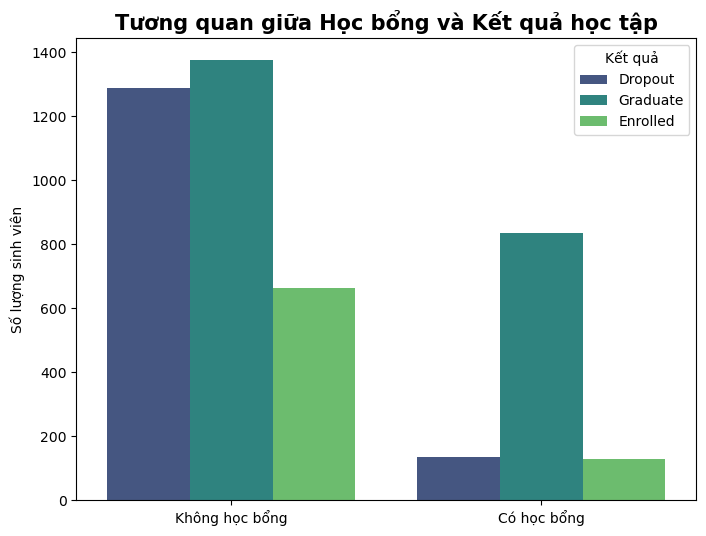

In [10]:
plt.figure(figsize=(8, 6))
df_temp = df.copy()
df_temp['Scholarship holder'] = df_temp['Scholarship holder'].map({1: 'Có học bổng', 0: 'Không học bổng'})
sns.countplot(data=df_temp, x='Scholarship holder', hue='Target', palette='viridis')
plt.title('Tương quan giữa Học bổng và Kết quả học tập', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('Số lượng sinh viên')
plt.legend(title='Kết quả')
plt.show()

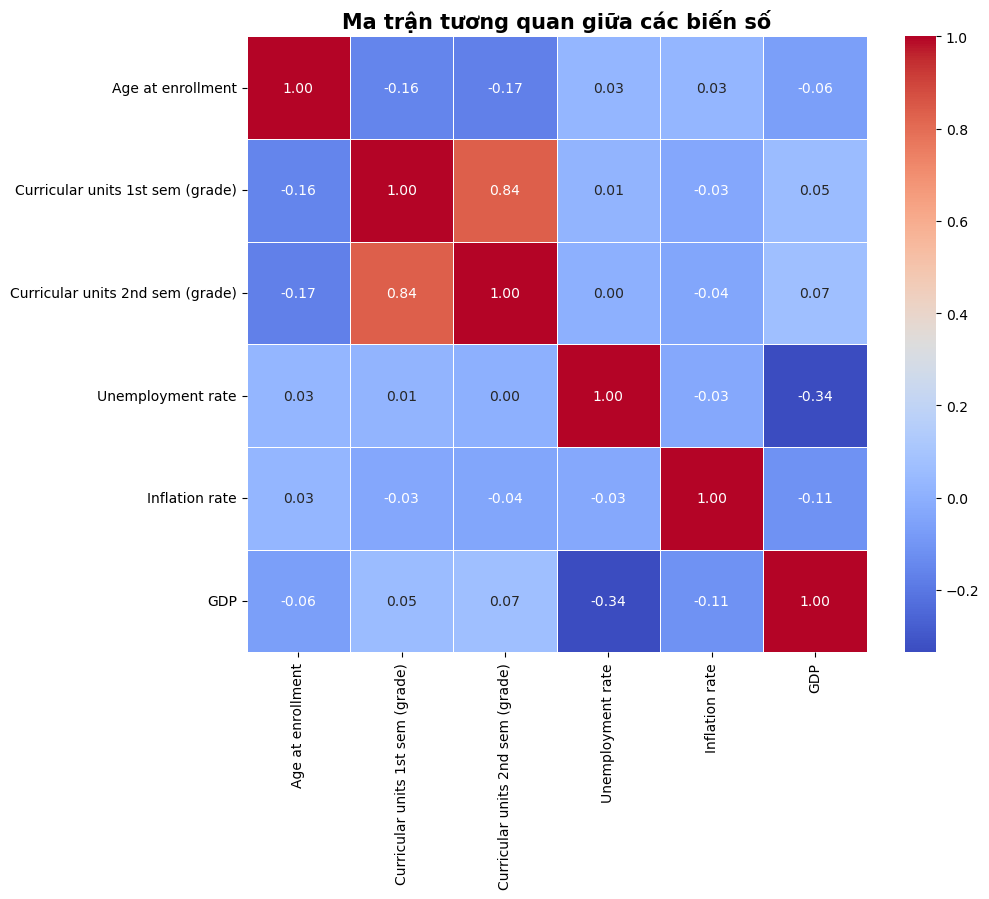

In [11]:
plt.figure(figsize=(10, 8))
cols_to_check = [
    'Age at enrollment', 
    'Curricular units 1st sem (grade)', 
    'Curricular units 2nd sem (grade)', 
    'Unemployment rate', 
    'Inflation rate', 
    'GDP'
]
corr_matrix = df[cols_to_check].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến số', fontsize=15, fontweight='bold')
plt.show()

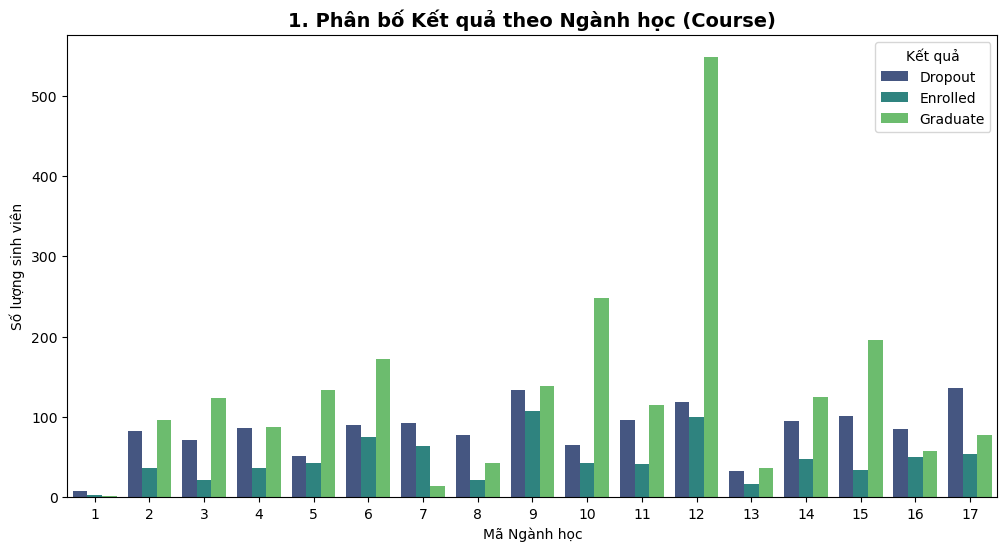

In [12]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='Course', hue='Target', palette='viridis')
plt.title('1. Phân bố Kết quả theo Ngành học (Course)', fontsize=14, fontweight='bold')
plt.xlabel('Mã Ngành học')
plt.ylabel('Số lượng sinh viên')
plt.legend(title='Kết quả', loc='upper right')
plt.show()

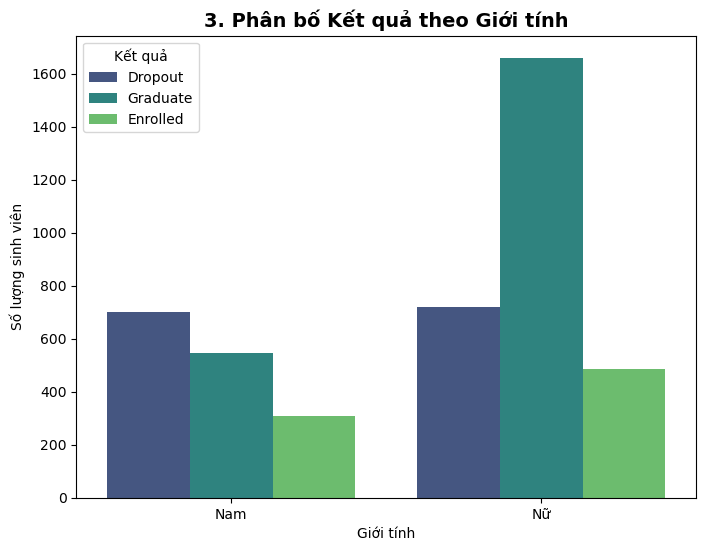

In [13]:
plt.figure(figsize=(8, 6))
df_gender = df.copy()
df_gender['Gender'] = df_gender['Gender'].map({1: 'Nam', 0: 'Nữ'})
sns.countplot(data=df_gender, x='Gender', hue='Target', palette='viridis')
plt.title('3. Phân bố Kết quả theo Giới tính', fontsize=14, fontweight='bold')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng sinh viên')
plt.legend(title='Kết quả')
plt.show()

# Tiền xử lí dữ liệu

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [16]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [17]:
df.duplicated().sum()

0

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

# chuyển đổi dữ liệu

In [20]:
mapping = {
    'Dropout': 1,
    'Graduate': 0,
    'Enrolled': 0
}
df['Target'] = df['Target'].replace(mapping)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5424\1055895165.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'] = df['Target'].replace(mapping)


In [21]:
cat_cols = [
    'Marital status', 'Application mode', 'Course', 'Previous qualification',
    'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation"
]

num_cols = [col for col in df.columns if col not in cat_cols + ['Target']]

print(f"\nSố cột categorical: {len(cat_cols)}")
print(f"Số cột numerical: {len(num_cols)}")


Số cột categorical: 9
Số cột numerical: 25


In [22]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),                              # Chuẩn hóa numerical
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)         # OneHot cho categorical
])

In [23]:
df['Target'].unique()

array([1, 0], dtype=int64)

In [24]:
X = df.drop('Target', axis=1)
y = df['Target'] 

In [25]:
X.shape

(4424, 34)

In [26]:
y.shape

(4424,)

# Slip data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
X_train.shape

(3539, 34)

In [30]:
X_test.shape

(885, 34)

# Chuẩn hóa dữ liệu

In [32]:
categorical_cols = [
    "Marital status", "Application mode", "Course", "Daytime/evening attendance", 
    "Previous qualification", "Nacionality", 
    "Mother's occupation", "Father's occupation", "Displaced", "Educational special needs", 
    "Debtor", "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]
numerical_cols = [
    "Application order", "Age at enrollment", "Mother's qualification", "Father's qualification",
    "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)", 
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", 
    "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)", 
    "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)", 
    "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)", 
    "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)", 
    "Unemployment rate", "Inflation rate", "GDP"
]

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# xử lí dữ liệu mất cân bằng

In [39]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5424\3426539695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_before.index, y=counts_before.values, ax=axes[0], palette='viridis')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5424\3426539695.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_after.index, y=counts_after.values, ax=axes[1], palette='deep')


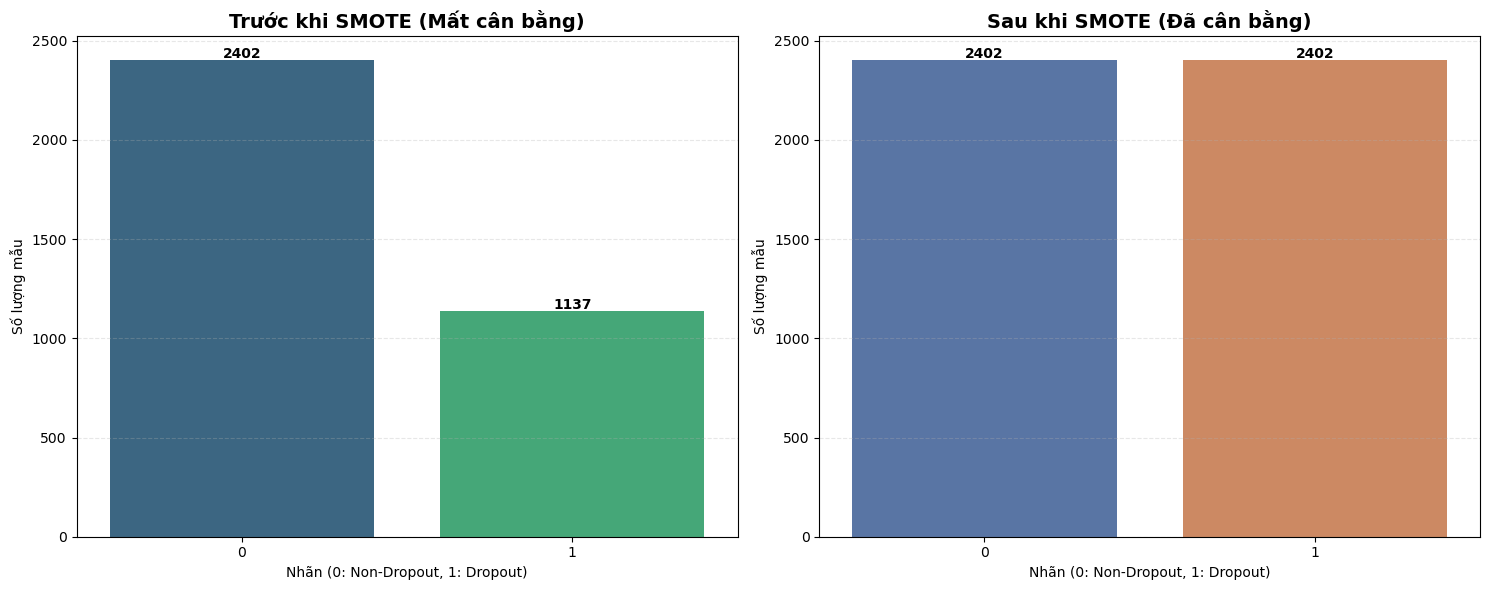

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
counts_before = pd.Series(y_train).value_counts().sort_index()
sns.barplot(x=counts_before.index, y=counts_before.values, ax=axes[0], palette='viridis')
axes[0].set_title('Trước khi SMOTE (Mất cân bằng)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Nhãn (0: Non-Dropout, 1: Dropout)')
axes[0].set_ylabel('Số lượng mẫu')
axes[0].grid(axis='y', linestyle='--', alpha=0.3)
for i, v in enumerate(counts_before.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')
counts_after = pd.Series(y_train_resampled).value_counts().sort_index()
sns.barplot(x=counts_after.index, y=counts_after.values, ax=axes[1], palette='deep')
axes[1].set_title('Sau khi SMOTE (Đã cân bằng)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Nhãn (0: Non-Dropout, 1: Dropout)')
axes[1].set_ylabel('Số lượng mẫu')
axes[1].grid(axis='y', linestyle='--', alpha=0.3)
for i, v in enumerate(counts_after.values):
    axes[1].text(i, v + 10, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Train mô hình

# Logistic Regression


--- KẾT QUẢ LOGISTIC REGRESSION
Độ chính xác (Accuracy):   0.8802
----------------------------------------
Báo cáo chi tiết (Classification Report):
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       601
           1       0.79      0.85      0.82       284

    accuracy                           0.88       885
   macro avg       0.86      0.87      0.87       885
weighted avg       0.88      0.88      0.88       885



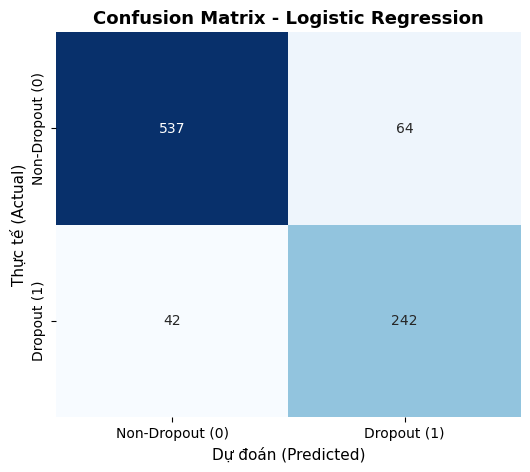

In [46]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_log = log_reg.predict(X_test_processed)
acc = accuracy_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log, pos_label=1)
print(f"\n--- KẾT QUẢ LOGISTIC REGRESSION")
print(f"Độ chính xác (Accuracy):   {acc:.4f}")
print("-" * 40)
print("Báo cáo chi tiết (Classification Report):")
print(classification_report(y_test, y_pred_log))
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_log)
labels = ['Non-Dropout (0)', 'Dropout (1)']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=labels, 
            yticklabels=labels)
plt.xlabel('Dự đoán (Predicted)', fontsize=11)
plt.ylabel('Thực tế (Actual)', fontsize=11)
plt.title('Confusion Matrix - Logistic Regression', fontsize=13, fontweight='bold')
plt.show()

# Random Forest


--- KẾT QUẢ RANDOM FOREST
Độ chính xác (Accuracy):   0.8791
Độ nhạy (Recall Dropout):  0.7676
----------------------------------------
Báo cáo chi tiết (Classification Report):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       601
           1       0.84      0.77      0.80       284

    accuracy                           0.88       885
   macro avg       0.87      0.85      0.86       885
weighted avg       0.88      0.88      0.88       885



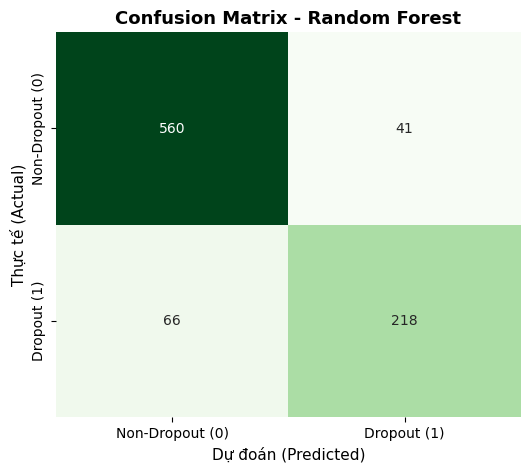

In [49]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_processed)
acc_rf = accuracy_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf, pos_label=1)
print(f"\n--- KẾT QUẢ RANDOM FOREST")
print(f"Độ chính xác (Accuracy):   {acc_rf:.4f}")
print(f"Độ nhạy (Recall Dropout):  {rec_rf:.4f}")
print("-" * 40)
print("Báo cáo chi tiết (Classification Report):")
print(classification_report(y_test, y_pred_rf))
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_rf)
labels = ['Non-Dropout (0)', 'Dropout (1)']
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Dự đoán (Predicted)', fontsize=11)
plt.ylabel('Thực tế (Actual)', fontsize=11)
plt.title('Confusion Matrix - Random Forest', fontsize=13, fontweight='bold')
plt.show()

Top 5 yếu tố quan trọng nhất:
                                 Feature  Importance
13   Curricular units 2nd sem (approved)    0.136252
7    Curricular units 1st sem (approved)    0.081256
14      Curricular units 2nd sem (grade)    0.075134
8       Curricular units 1st sem (grade)    0.054982
177            Tuition fees up to date_0    0.036955


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5424\2621434136.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(20), palette='viridis')


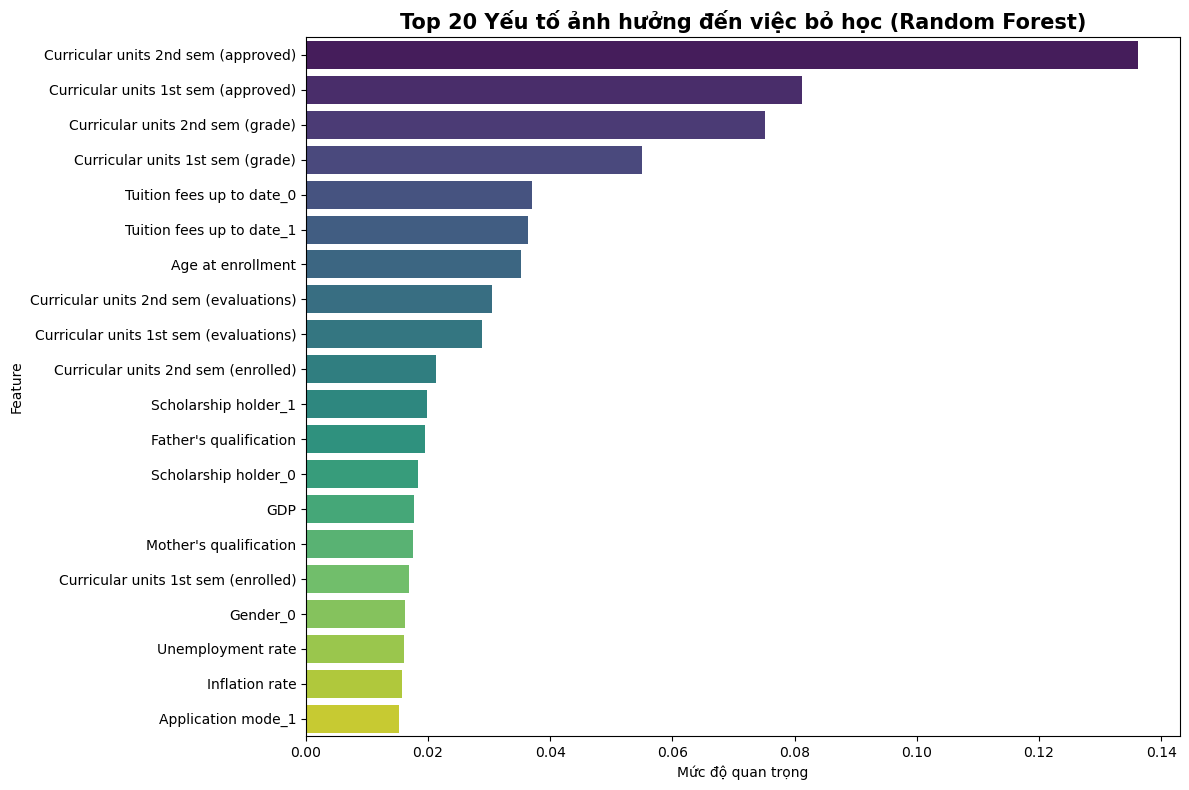

In [52]:
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
final_feature_names = numerical_cols + list(ohe_feature_names)
importances = rf_model.feature_importances_
feature_imp_df = pd.DataFrame({
        'Feature': final_feature_names,
        'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("Top 5 yếu tố quan trọng nhất:")
print(feature_imp_df.head(5))
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(20), palette='viridis')
plt.title('Top 20 Yếu tố ảnh hưởng đến việc bỏ học (Random Forest)', fontsize=15, fontweight='bold')
plt.xlabel('Mức độ quan trọng')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


--- KẾT QUẢ KNN (SAU KHI SMOTE) ---
Độ chính xác (Accuracy):   0.7819
Độ nhạy (Recall Dropout):  0.8028 
----------------------------------------
Báo cáo chi tiết (Classification Report):
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       601
           1       0.62      0.80      0.70       284

    accuracy                           0.78       885
   macro avg       0.76      0.79      0.77       885
weighted avg       0.81      0.78      0.79       885



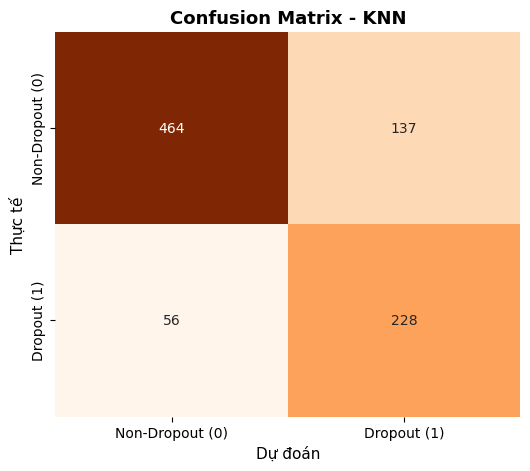

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_model.predict(X_test_processed)
acc_knn = accuracy_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn, pos_label=1)
print(f"\n--- KẾT QUẢ KNN (SAU KHI SMOTE) ---")
print(f"Độ chính xác (Accuracy):   {acc_knn:.4f}")
print(f"Độ nhạy (Recall Dropout):  {rec_knn:.4f} ")
print("-" * 40)
print("Báo cáo chi tiết (Classification Report):")
print(classification_report(y_test, y_pred_knn))
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_knn)
labels = ['Non-Dropout (0)', 'Dropout (1)']
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False, 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - KNN', fontsize=13, fontweight='bold')
plt.xlabel('Dự đoán', fontsize=11)
plt.ylabel('Thực tế', fontsize=11)
plt.show()


--- KẾT QUẢ NAIVE BAYES
Độ chính xác (Accuracy):   0.3480
Độ nhạy (Recall Dropout):  0.9894
----------------------------------------
Báo cáo chi tiết (Classification Report):
              precision    recall  f1-score   support

           0       0.90      0.04      0.09       601
           1       0.33      0.99      0.49       284

    accuracy                           0.35       885
   macro avg       0.61      0.52      0.29       885
weighted avg       0.72      0.35      0.22       885



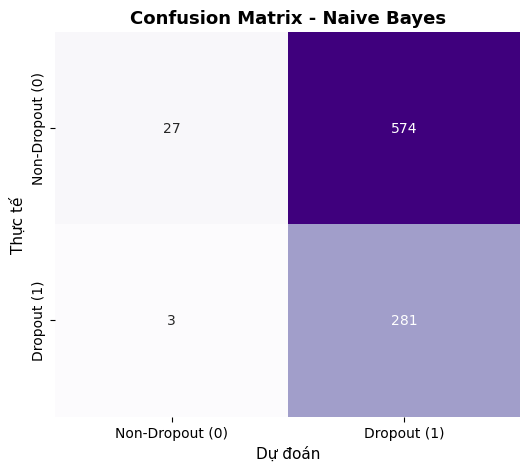

In [54]:
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)
y_pred_nb = nb_model.predict(X_test_processed)
acc_nb = accuracy_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb, pos_label=1)
print(f"\n--- KẾT QUẢ NAIVE BAYES")
print(f"Độ chính xác (Accuracy):   {acc_nb:.4f}")
print(f"Độ nhạy (Recall Dropout):  {rec_nb:.4f}")
print("-" * 40)
print("Báo cáo chi tiết (Classification Report):")
print(classification_report(y_test, y_pred_nb))
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_nb)
labels = ['Non-Dropout (0)', 'Dropout (1)']
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False, 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Naive Bayes', fontsize=13, fontweight='bold')
plt.xlabel('Dự đoán', fontsize=11)
plt.ylabel('Thực tế', fontsize=11)
plt.show()

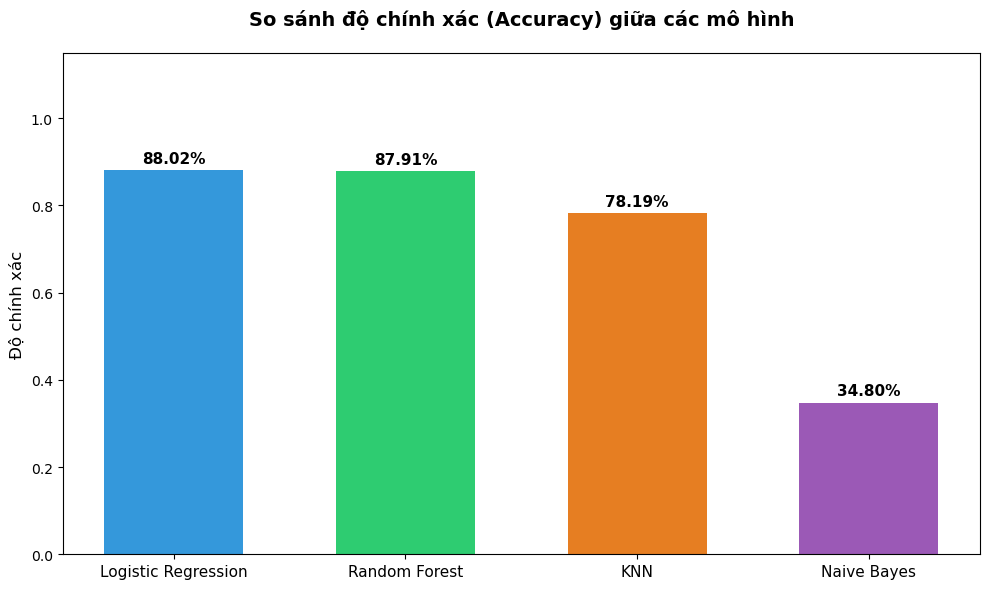

In [55]:
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf) 
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_nb = accuracy_score(y_test, y_pred_nb)
model_names = ['Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes']
accuracies = [acc_log, acc_rf, acc_knn, acc_nb]
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['#3498db', '#2ecc71', '#e67e22', '#9b59b6'], width=0.6)
for bar in bars:
    yval = bar.get_height()
    # Hiển thị số phần trăm (nhân 100)
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        yval + 0.01, 
        f'{yval*100:.2f}%', 
        ha='center', va='bottom', fontweight='bold', fontsize=11
    )
plt.title('So sánh độ chính xác (Accuracy) giữa các mô hình', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Độ chính xác', fontsize=12)
plt.xticks(fontsize=11)
plt.ylim(0, 1.15) 

plt.tight_layout()
plt.show()